<a target="_blank" href="https://colab.research.google.com/github/raghavbali/mastering_llms_workshop/blob/main/docs/module_01_lm_fundamentals/02_contextual_embeddings.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Contextual Embeddings

**Context is Important**

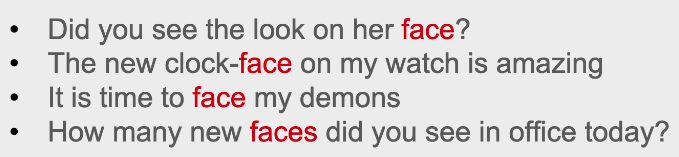

---

**Non-Local Interactions are Common**

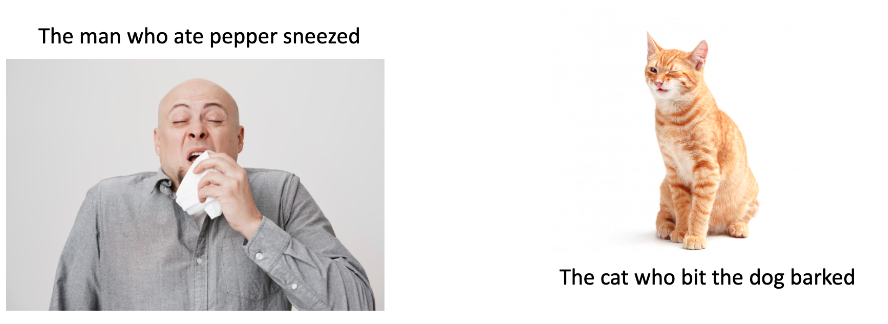

---

The above examples showcase that:
- Words are **not** discrete symbols
- Interactions **may not** always be local

In [18]:
docs = [
    "did you see the look on her face",
    "the new clock face on my watch is amazing",
    "it is time to face my demons",
    "how many new faces did you see in the office today"
]

In [63]:
import numpy as np
from transformers import AutoTokenizer, AutoModel

# model details: https://huggingface.co/google-bert/bert-base-uncased
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

/Users/raghavbali/.pyenv/versions/3.11.9/envs/datahack/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` wi

In [43]:
token_ids = tokenizer(docs[0], return_tensors='pt')
print(docs[0])
print(token_ids['input_ids'])

did you see the look on her face
tensor([[ 101, 2106, 2017, 2156, 1996, 2298, 2006, 2014, 2227,  102]])


In [24]:
tokenizer.decode([2227])

'face'

In [4]:
contextual_embeddings = model(**token_ids)[0]
contextual_embeddings

tensor([[[ 3.1853e-01, -7.7985e-02, -3.1750e-01,  ..., -3.7007e-01,
           1.6433e-01,  2.4371e-01],
         [ 9.7395e-01, -5.2053e-01, -1.2138e+00,  ...,  2.3263e-01,
           9.4492e-02, -5.8686e-02],
         [ 8.5855e-02, -6.8682e-01, -4.7859e-01,  ...,  4.9321e-01,
           3.8547e-01, -1.0251e+00],
         ...,
         [-3.0567e-01, -9.8779e-01, -4.9460e-01,  ..., -4.2728e-01,
          -8.3655e-02,  1.0762e-02],
         [-1.0174e-02, -9.4509e-01, -6.3326e-01,  ..., -1.7718e-03,
           3.9679e-04,  1.6362e-01],
         [ 8.2731e-01, -1.0750e-01, -4.7914e-01,  ..., -5.9947e-02,
          -6.9047e-01, -5.4907e-01]]], grad_fn=<NativeLayerNormBackward0>)

In [10]:
# embedding for the word "face"
contextual_embeddings[0][8]

tensor([-1.0174e-02, -9.4509e-01, -6.3326e-01, -8.1450e-02,  3.6937e-01,
        -1.5216e-01,  3.4586e-04,  1.1189e+00, -8.0803e-01, -4.3661e-01,
         8.3433e-01, -5.4889e-02,  1.1062e-01, -3.2170e-02, -3.7400e-01,
        -2.3557e-01,  6.0297e-01, -2.5961e-01, -7.1446e-01, -3.1950e-01,
         5.2456e-01, -7.5880e-01, -3.2630e-01,  2.7916e-01,  4.5263e-01,
        -3.4062e-01,  4.7958e-01, -4.3930e-01,  2.0992e-01, -7.6188e-02,
         2.5165e-01, -5.4669e-01, -2.1254e-01,  6.6762e-01,  2.4672e-01,
         7.9906e-01, -1.4821e-01, -4.6870e-01, -1.4037e+00,  7.5006e-01,
        -1.2254e+00, -5.2884e-01,  1.2169e-01, -3.2329e-03,  1.8035e-01,
         1.2131e-01,  6.9857e-01, -3.3437e-02,  1.2066e+00,  8.6809e-01,
        -7.4546e-01,  3.3571e-01,  5.6187e-01,  8.7649e-01,  6.4363e-01,
        -3.1384e-01, -3.5155e-01, -4.9480e-01, -8.7892e-01, -4.0899e-01,
        -6.5596e-01,  1.2735e-01, -5.3966e-02, -6.1346e-01,  2.1477e-01,
        -5.8504e-02, -8.5735e-02,  2.0950e-01, -6.5

In [39]:
def get_doc_embedding(doc,debug=False):
    token_ids = tokenizer(doc, return_tensors='pt')
    if debug:
        print(f"Original Text={doc}")
        print(f"Token IDs ={token_ids['input_ids']}")
        print(f"Decoded Text={tokenizer.decode(token_ids['input_ids'][0])}")
    return model(**token_ids)[0]

In [42]:
doc2_embeddings = get_doc_embedding(docs[1],True)

Original Text=the new clock face on my watch is amazing
Token IDs =tensor([[ 101, 1996, 2047, 5119, 2227, 2006, 2026, 3422, 2003, 6429,  102]])
Decoded Text=[CLS] the new clock face on my watch is amazing [SEP]


In [41]:
print(f"Are Embedding Vectors for the word 'face' in sentences 1 and 2 similar: {torch.allclose(contextual_embeddings[0][8], doc2_embeddings[0][4])}")

Are Embedding Vectors for the word 'face' in sentences 1 and 2 similar: False


## Practical Utility of Contextual Embeddings
---
### Semantic Search

Semantic search seeks to improve search accuracy by understanding the content of the search query. In contrast to traditional search engines which only find documents based on lexical matches, semantic search can also find synonyms.

The idea behind semantic search is to embed all entries in your corpus, whether they be sentences, paragraphs, or documents, into a vector space.
At search time, the query is embedded into the same vector space and the closest embeddings from your corpus are found. These entries should have a high semantic overlap with the query.

<img src="https://www.researchgate.net/profile/Peter-Vyboch/publication/351838554/figure/fig7/AS:1027266821750790@1621930904237/Sentence-BERT-architecture-adapted-from-Sentence-BERT-Sentence-Embeddings-using-Siamese.ppm">

> Source: Sentence-BERT architecture (adapted from Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks (Reimers et al., 2019))

In [70]:
from sentence_transformers import SentenceTransformer, util
import torch

In [71]:
# https://huggingface.co/microsoft/MiniLM-L12-H384-uncased
# MiniLM: Small and Fast Pre-trained Models for Language Understanding and Generation
# MiniLMv1-L12-H384-uncased: 12-layer, 384-hidden, 12-heads, 33M parameters, 2.7x faster than BERT-Base

model = SentenceTransformer('all-MiniLM-L12-v2')

/Users/raghavbali/.pyenv/versions/3.11.9/envs/datahack/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [72]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [73]:
doc_embeddings = model.encode(docs)

In [74]:
doc_embeddings.shape

(4, 384)

In [75]:
new_doc_1 = "his face was red with anger"
new_doc_2 = "time to face the consequences of your actions."

In [76]:
new_doc_1_embedding = model.encode(new_doc_1)
new_doc_2_embedding = model.encode(new_doc_2)

In [110]:
cos_sim_scores = util.pytorch_cos_sim(new_doc_1_embedding, doc_embeddings)[0]
print(f"Most similar sentence to the input: \t'{new_doc_1}'")
print(f"\t\t\t\tis:\t'{docs[np.argmax(cos_sim_scores)]}'")
print(f"\t   with a similarity score=\t {cos_sim_scores[np.argmax(cos_sim_scores)]}")

Most similar sentence to the input: 	'his face was red with anger'
				is:	'did you see the look on her face'
	   with a similarity score=	 0.3590850830078125


In [111]:
cos_sim_scores = util.pytorch_cos_sim(new_doc_2_embedding, doc_embeddings)[0]
print(f"Most similar sentence to the input: \t'{new_doc_2}'")
print(f"\t\t\t\tis:\t'{docs[np.argmax(cos_sim_scores)]}'")
print(f"\t   with a similarity score=\t {cos_sim_scores[np.argmax(cos_sim_scores)]}")

Most similar sentence to the input: 	'time to face the consequences of your actions.'
				is:	'it is time to face my demons'
	   with a similarity score=	 0.47977614402770996


---
## Recap
- Words meanings based on context and non-local interactions
- Pretrained Transformer based models go beyond simple word embedding models
- Contextual embeddings are better at finding similarities between documents

## But What is BERT ?